# 8. QLS - Statistical Moments

## Skewness & Kurtosis

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sb
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.set_style("whitegrid", {"grid.color":".6", "grid.linestyle":":"})
import yfinance as yf

Sometimes mean and variance aren't enough to describe a distribution. When we calculate variance, we square the deviations around the mean. The problem is, with large deviations we don't know if they're positive or negative.

This is where the skewness and symmetry of a distribution come in. A distribution is *symmetric* if the parts on either side of the mean are mirrored.

For example, the normal distribution is symmetric. The normal distribution with mean $\mu$ and standard deviation $\sigma$ is defined as:

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{(x- \mu)^{2}}{2 \sigma^{2}}}$$

We can plot it to confirm that it's symmetric:

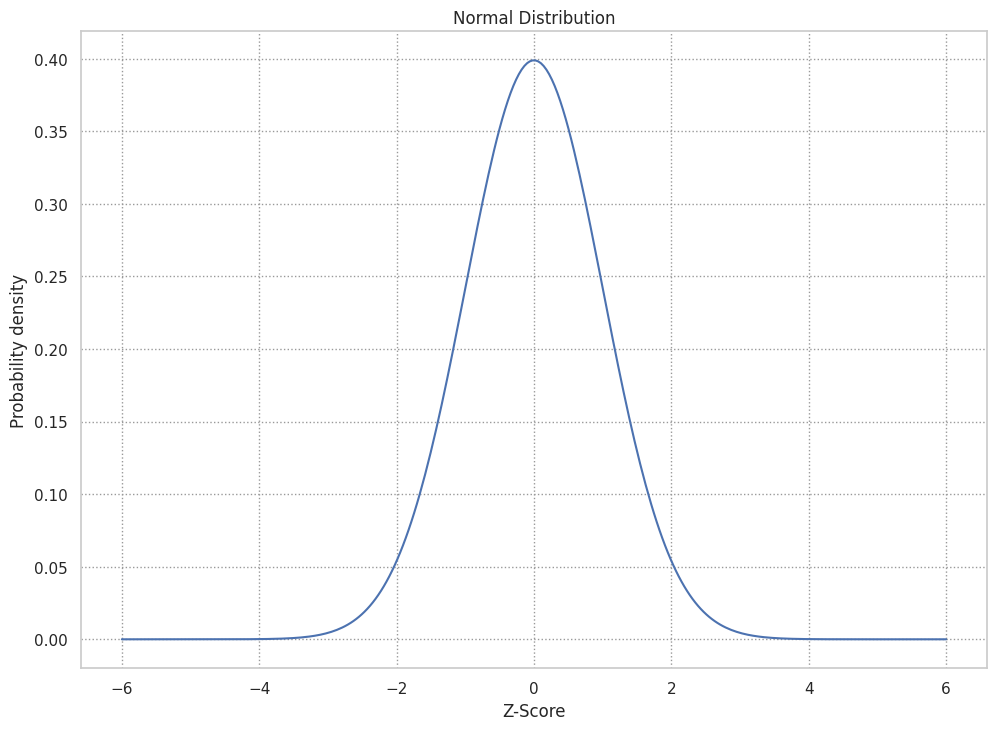

In [2]:
# plot a normal distribution with mean = 0 and standard deviation = 2
xs = np.linspace(-6, 6, 300)
normal = stats.norm.pdf(xs)
sb.lineplot(x=xs, y=normal).set(title="Normal Distribution", xlabel="Z-Score", ylabel="Probability density");

### Skewness

A distribution which is not symmetric is called *skewed*. For instance, a distribution might have many small positives and a few large negative values (negatively skewed) or vice versa (positively skewed), and still have a mean of 0.

A symmetric distribution has skewness 0. Positively skewed uni-modal (one mode) distributions have the property that mean > median > mode. Negatively skewed uni-modal distributions are the reverse, with mean < median < mode. All three are equal for a symmetric uni-modal distribution.

The explicit formula for skewness is:

$$S_{k} = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^{n} (X_{i} - \mu)^{3}}{\sigma^{3}}$$

Where $n$ is the number of observations, $\mu$ is the arithmetic mean, and $\sigma$ is the standard deviation. The sign of this quantity describes the direction of the skew. We can plot a positively/negatively skewed distributions to see how they look. For uni-modal distributions, a negative skew indicates that the tail is fatter on the left, and vice-versa.

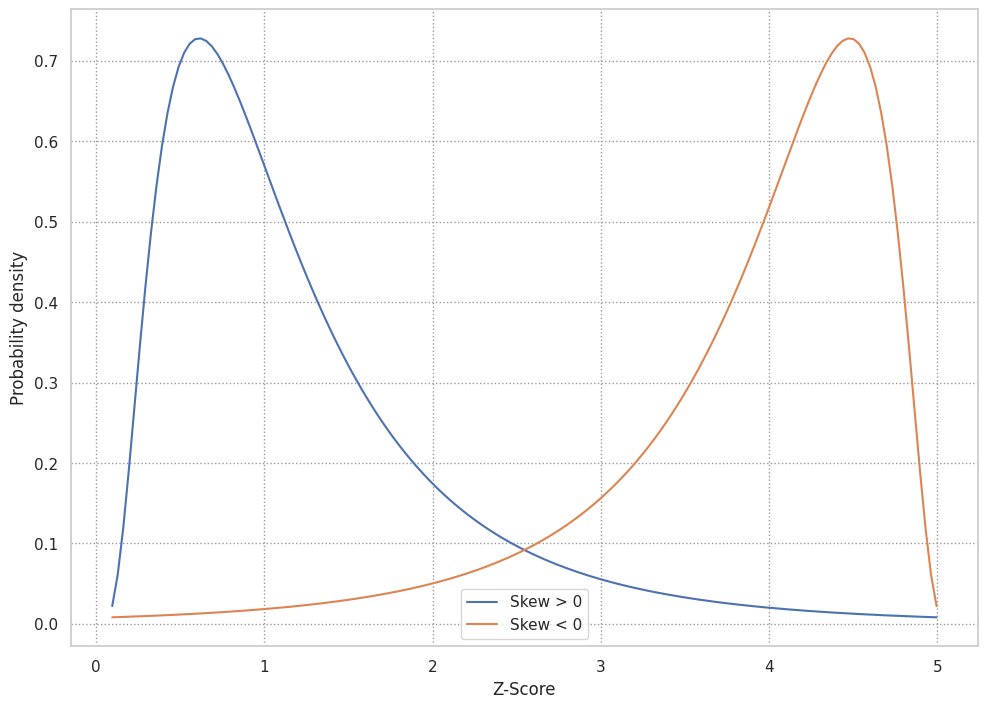

In [3]:
# generate x-values for which we will plot the distribution
xs2 = np.linspace(stats.lognorm.ppf(0.01, .7, loc=-.1), stats.lognorm.ppf(0.99, .7, loc=-.1), 150)
lognormal = stats.lognorm.pdf(xs2, .7)

# negatively skewed distribution
sb.lineplot(x=xs2, y=lognormal, label="Skew > 0")
# positively skewed distribution
sb.lineplot(x=xs2, y=lognormal[::-1], label="Skew < 0").set(xlabel="Z-Score", ylabel="Probability density");

Although skew is less obvious when graphing discrete data sets, we can still compute it. For example, below we have the skew, mean, and media for the S&P500 returns 2012-2014. The skew is negative, so the mean is less than the median.

[*********************100%***********************]  1 of 1 completed
Skew: -0.12511903316790773
Mean: 0.0008516562543120671
Median: 0.0007248450650563232


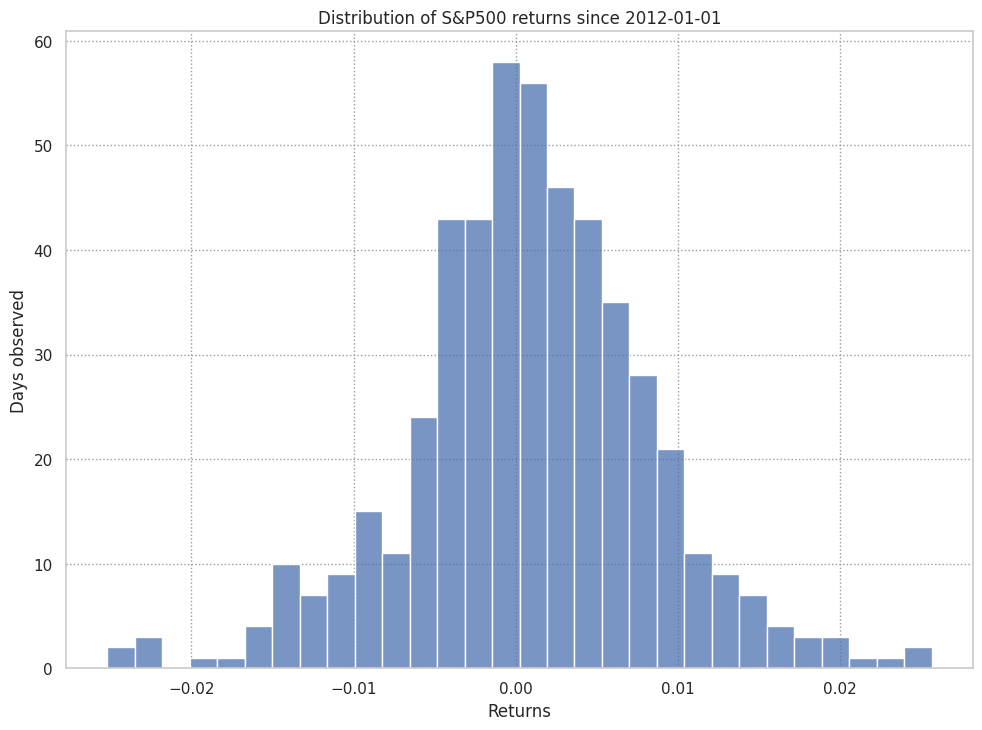

In [4]:
start = "2012-01-01"
end = "2014-01-01"

pricing = yf.download("SPY", start, end)
returns = pricing["Adj Close"].pct_change()[1:]
sb.histplot(data=returns, bins=30).set(title=f"Distribution of S&P500 returns since {start}", xlabel="Returns", ylabel="Days observed")

print("Skew:", stats.skew(returns))
print("Mean:", np.mean(returns))
print("Median:", np.median(returns))

### Kurtosis

This attempts to measure the shape of the deviation from the mean. It describes how peaked a distribution is compared to the normal distribution, called mesokurtic.

All normal distributions, regardless of mean/variance, have a kurtosis of $3$. A leptokurtic distribution (kurtosis $>3$) is highly peaked and has fat tails. While a platykurtic distribution (kurtosis $<3$) is broad.

Sometimes kurtosis in excess of the normal distribution (kurtosis $-3$) is used, this is the default in `scipy`. A leptokurtic distribution has more frequent jumps away from the mean than a normal distribution does, while a platykurtic distribution has fewer.

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.5937628755982794


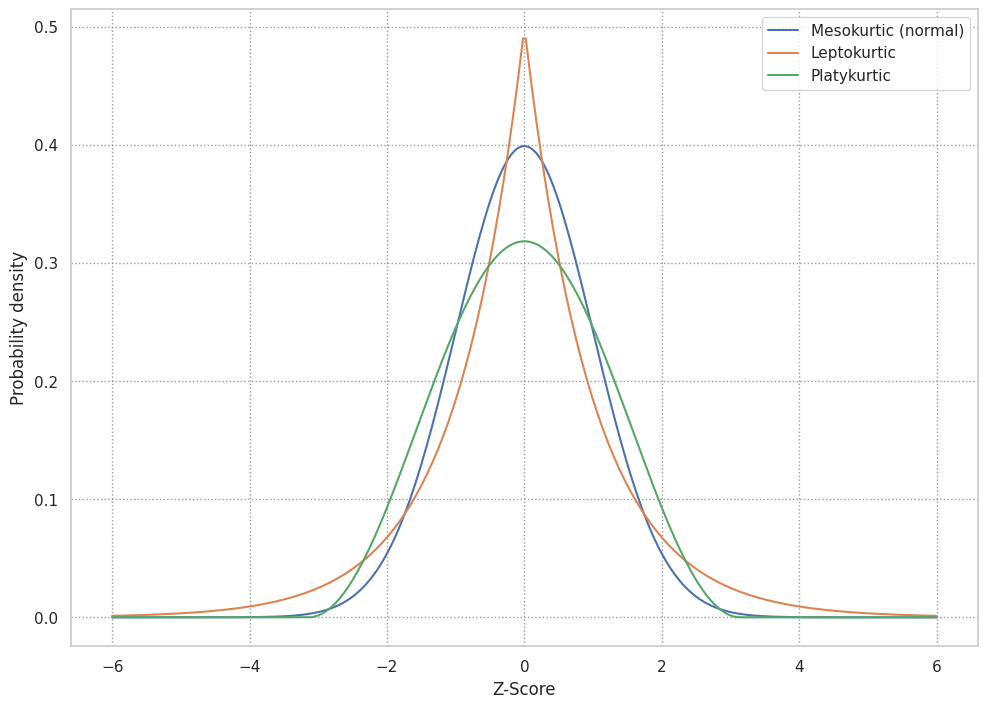

In [5]:
print("Excess kurtosis of leptokurtic distribution:", (stats.laplace.stats(moments="k")))
print("Excess kurtosis of mesokurtic distribution:", (stats.norm.stats(moments='k')))
print("Excess kurtosis of platykurtic distribution:", (stats.cosine.stats(moments="k")))

# mesokurtic distribution
sb.lineplot(x=xs, y=normal, label="Mesokurtic (normal)")
# leptokurtic distribution
sb.lineplot(x=xs, y=stats.laplace.pdf(xs), label="Leptokurtic")
# platykurtic
sb.lineplot(x=xs, y=stats.cosine.pdf(xs), label="Platykurtic").set(xlabel="Z-Score", ylabel="Probability density");

The formula for kurtosis is:

$$ K = \left( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^{n} (X_{i} - \mu)^{4}}{\sigma^{4}} \right)$$

While excess kurtosis is given by:

$$K_{E} = \left( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^{n} (X_{i} - \mu)^{4}}{\sigma^{4}} \right) - \frac{3(n-1)^{2}}{(n-2)(n-3)}$$

For a large number of samples, the excess kurtosis becomes approximately:

$$K_{E} \approx \frac{1}{n} \frac{\sum_{i=1}^{n} (X_{i} - \mu)^{4}}{\sigma^{4}} - 3$$

Since we were considering perfect, continuous distributions, this was the form that kurtosis took. However,for samples drawn for normal distribution, we would use the first definition, and excess kurtosis would be approximately 0.

We can use `scipy` to find the excess kurtosis of the S&P500 returns from before.

In [6]:
print("Excess kurtosis of returns:", stats.kurtosis(returns))

Excess kurtosis of returns: 1.0949727044582893


The histogram of the returns shows multiple large spikes away from the mean, so we shouldn't be surprised that the kurtosis is indicating a leptokurtic distribution.

## Other Standardized Moments

Variance, skewness, and kurtosis take similar forms. They're the most important standardized moments, of with the $k$th has the form:

$$\frac{E[(X - E[X])^{k}]}{\sigma^{k}}$$

The first standardized moment is always $0 (E[X - E[X]] = E[X] - E[E[X]] = 0)$, so we only care about the second through forth. These are all dimensionless numbers which describe the distribution, and quantify how close to normal a distribution is.


### Normality Testing Using Jarque-Bera

This is a common statistical test that compares whether sample data has skewness and kurtosis similar to a normal distribution. We can run it on the S&P500 returns to find the p-value for them coming from a normal distribution.

The null hypothesis is that the data came from a normal distribution. Because of this, it can err on the side of not catching a non-normal process if you have a low p-value. To be safe, it can be good to increase your cutoff when using the test.

We need to treat p-values as binary, and not read into them or compare them. We'll use a cutoff of 0.05 for our p-value.

#### Test Calibration

Each test is written differently across languages. We might not know whether it's the null or alternative hypothesis that the tested data comes from a normal distribution. It's often a good idea to calibrate a test by checking it on simulated data and making sure it gives the right answer. Let's do that now.

In [7]:
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000

pvalues = np.ndarray(N)

for i in range(N):
    # draw M samples from a normal distribution
    X = np.random.normal(0, 1, M)
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue

# count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print(float(num_significant) / N)

0.054


If properly calibrated we should expect to be wrong 5% of the time at a 0.05 significance level, and this is pretty close. This means the test is working as expected.

In [8]:
_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print("The returns are likely normal as it has a P-Value of", pvalue)
else:
    print("The returns are likely abnormal, as it has a P-Value of", pvalue)

The returns are likely abnormal, as it has a P-Value of 1.9111865649253784e-06


This tells us the S&P500 returns likely don't follow a normal distribution.